In [1]:
#MNIST dataset downloaded from kaggle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('mnist_train.csv')

#print first 5 rows of d0
print(d0.head(5))

#save the labels into a variable l
l =d0['label']

#drop the label feature and store the pixel data in d
d = d0.drop("label", axis=1) 

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [2]:
#print the shape and size of your data
print(d.shape)
#shape and size of labels
print(l.shape)

(42000, 784)
(42000,)


In [10]:
#display or plot a number using the given pixel data
plt.figure(figsize=(7,7))
idx=6

#reshape from 1d to 2d
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
#show image
plt.imshow(grid_data, interpolation = "none", cmap = "gray")

#cross check the image with the number at the index idx
print(l[idx])

C:\Users\Abhi_Uzumaki\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


7


## 2D Visualization using PCA

In [13]:
#pick starting 15k data-points to work on for time-frequency
labels = l.head(15000)
data = d.head(15000)

print("the shape of sample data is = ", data.shape)

the shape of sample data is =  (15000, 784)


### Pre-Processing: Standarding the data

In [15]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [17]:
#find co-variance matrix which is : A^T*A
sample_data = standardized_data

#matrix multiplication using numpy
covar_matrix = np.matmul(sample_data.T , sample_data)

print( " the shape of the covariance matrix = ", covar_matrix.shape)


 the shape of the covariance matrix =  (784, 784)


In [20]:
#finding the top two eigen vales and corresponding eigen-vectors
#for projecting onto a 2-dim space.


#importing a function
from scipy.linalg import eigh
#explation of what this function does
#the parameters 'eigvals' is defined (low value to high value)
#eigh function will return the eigen values is ascending order
#this code generate only the top two (782 and 783) eigen values
values, vectors = eigh(covar_matrix, eigvals=(782,783))

print( "Shape of eigen vectors = ", vectors.shape)
#converting the eigen vectors into 2d shape for easyness for further computation
vectors = vectors.T

print("updated shape of eigen vectors = ", vectors.shape)
#here the vectors[1] represent the eigen vector corresponding 1st principal
#here the vectors[0] represent the eigen vector corresponding 2nd principal



Shape of eigen vectors =  (784, 2)
updated shape of eigen vectors =  (2, 784)


In [32]:
#projecting the original data sample on the plane
#formed by two princiapl eigen vectors by vector vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)

print ("resultatnt new data points shape ", vectors.shape, "X", sample_data.T.shape , "=", new_coordinates.shape )

resultatnt new data points shape  (2, 784) X (784, 15000) = (2, 15000)


In [34]:
import pandas as pd

#appending label to the 2d projected data
new_coordinates = np.vstack((new_coordinates, labels)).T

#creating a new data frame for plotting the labeled points.
dataframe = pd.DataFrame(data=new_coordinates, columns=("1st_principal", "2nd_principal", "label"))

print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.558661      -5.043558    1.0
1       6.193635      19.305278    0.0
2      -1.909878      -7.678775    1.0
3       5.525748      -0.464845    4.0
4       6.366527      26.644289    0.0


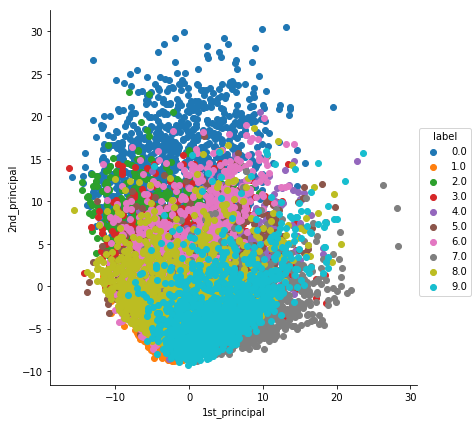

In [36]:
#plotting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue="label", size=6).map(plt.scatter, '1st_principal','2nd_principal').add_legend()
plt.show()

### PCA using Scikit-Learn

In [38]:
#initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

In [39]:
#configuring the parameteres
#the no. of components are two
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)

#pca_reduced will contain the 2-d projects of simple data
print("shape of pca_reduced.shape = ", pca_data.shape)

shape of pca_reduced.shape =  (15000, 2)


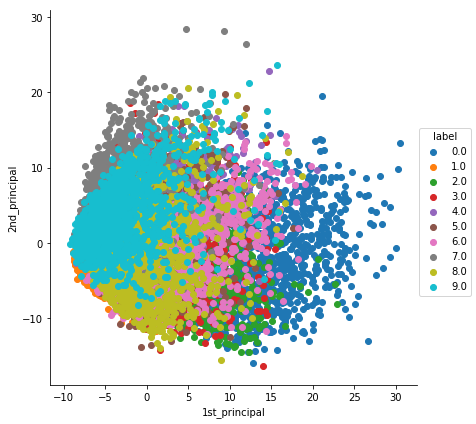

In [40]:
#attaching the label for each 2-d data point
pca_data = np.vstack((pca_data.T, labels)).T

#creating a new data from which help us in plotting the result data
pca_df = pd.DataFrame(data=pca_data, columns=("1st_principal", "2nd_principal", "label"))
sn.FacetGrid(pca_df, hue="label", size=6).map(plt.scatter, '1st_principal', '2nd_principal').add_legend()
plt.show()

## PCA for dimensionality reduction

In [42]:
#pca for dimensionality reduction not for visualization
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)

percentage_var_explained = pca.explained_variance_/np.sum(pca.explained_variance_ )

cum_var_explained = np.cumsum(percentage_var_explained)

#plot the pca specturm

plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative_explained_variance')
plt.show()


#this fig will show that on the numbers of features given how much variance is explained
#for example: for 100 no. of components 75% of variance is explained means reaminig components will only able to explain 25% of variance
#similarly if we take 400 no of components they are able to explain 98% of variance (means these 400 components are valuable remainig ones are senseless data)


## T-SNE using Scikit-Learn

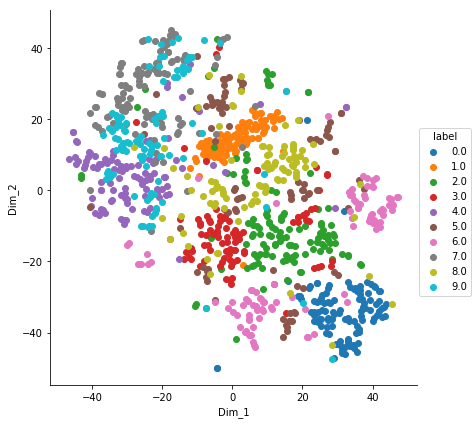

In [46]:
#import tsne

from sklearn.manifold import TSNE

#picking the top 1000 points as TSNE takes a lot of time for 15k points
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]

model = TSNE(n_components =2, random_state= 0)
#configuring the parameters
#the numbers of components = 2
#default perplexicity = 30
#default leaning rate = 200
#default maiximum numer of iterations for the optimization = 1000

tsne_data = model.fit_transform(data_1000)


#crating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

In [47]:
model = TSNE(n_components =2, random_state= 0, perplexity=50)
tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

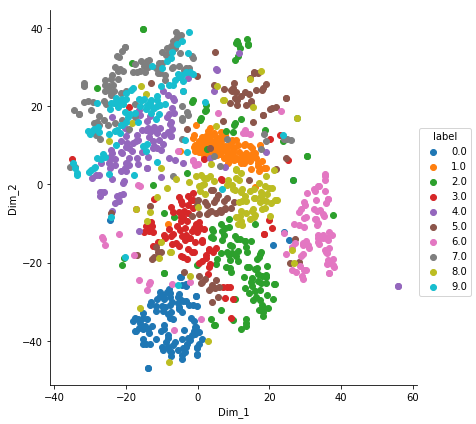

In [48]:
model = TSNE(n_components =2, random_state= 0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_1000)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()

### tsne on 15K 

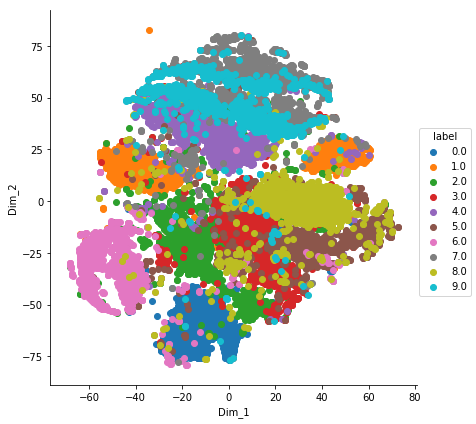

In [49]:
model = TSNE(n_components =2, random_state= 0, perplexity=50)
tsne_data = model.fit_transform(standardized_data)


#creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T,labels)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1", "Dim_2", "label"))

#ploting the result of tsne
sn.FacetGrid(tsne_df, hue="label", size=6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend()
plt.show()